In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mode
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.ticker as tick
from sklearn.model_selection import GridSearchCV
from pylab import rcParams
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
two=pd.read_csv('1.csv')
two_1=pd.read_csv('1.csv')

In [3]:
j=-1
for i in two.loc[:,'GarageArea']:
    j=j+1
    if i==0.0:
        two.loc[j,['GarageFinish','GarageQual','GarageCond','GarageType']]=two.loc[j,['GarageFinish','GarageQual','GarageCond','GarageType']].fillna('NA')
two.loc[2576,['GarageArea']]=two.loc[2576,['GarageArea']].fillna(0)
two.loc[[2576],["GarageQual","GarageFinish","GarageCond", "GarageCars"]]=two.loc[[2576],["GarageQual","GarageFinish","GarageCond", "GarageCars"]].fillna('NA')
two.loc[2126,['GarageFinish']]=two.loc[2126,['GarageFinish']].fillna(mode(two['GarageFinish']))
two.loc[2126,['GarageQual']]=two.loc[2126,['GarageQual']].fillna(mode(two['GarageQual']))
two.loc[2126,['GarageCond']]=two.loc[2126,['GarageCond']].fillna(mode(two['GarageCond']))
two.loc[:,"FireplaceQu"]=two.loc[:,"FireplaceQu"].fillna('NA')
j=-1
for i in two.loc[:,'TotalBsmtSF']:
    j=j+1
    if i==0.0:
        two.loc[j,['BsmtQual','BsmtCond','BsmtFinType2','BsmtFinType1','BsmtExposure']]=two.loc[j,['BsmtQual','BsmtCond','BsmtFinType2','BsmtFinType1','BsmtExposure']].fillna('NA')
        two.loc[j,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath']]=two.loc[j,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath']].fillna(0)
two['BsmtFinType1']=two['BsmtFinType1'].fillna(mode(two['BsmtFinType1']))
two['BsmtFinType2']=two['BsmtFinType2'].fillna(mode(two['BsmtFinType2']))
two['BsmtExposure']=two['BsmtExposure'].fillna(mode(two['BsmtExposure']))

In [4]:
two["TotalSF"] =  two["1stFlrSF"] + two["2ndFlrSF"]+two['TotalBsmtSF']

In [5]:
two["allBath"] =  two["FullBath"] + two["HalfBath"]*0.5+two['BsmtFullBath']+two['BsmtHalfBath']*0.5

In [6]:
two=two.drop(['TotalBsmtSF','YearBuilt',"FullBath","HalfBath",'BsmtFullBath','BsmtHalfBath',"1stFlrSF","2ndFlrSF",'PoolQC','MiscFeature','Alley','Fence','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BldgType',  'CentralAir', 'Condition1', 'Condition2', 'Electrical','Exterior2nd','Foundation', 'Functional','Heating', 'HouseStyle',  'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MasVnrType', 'PavedDrive', 'RoofMatl',  'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'],axis=1)

In [7]:
two=two.drop(['MoSold','BsmtFinType2','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','OpenPorchSF'],axis=1)

In [8]:
train_ID = train.loc[:,['Id']]
test_ID = test.loc[:,'Id']
y_train= np.log(train['SalePrice'])
# split data for training
X_train = train.drop('Id',axis=1)
X_test = test.drop('Id',axis=1)
# dealing with missing data

In [9]:
two['MSSubClass']=two['MSSubClass'].map({20:'1-st new',30:'1-st old',40:'1-st all', 45:'1-1/2 un',50:'1-1/2 f',60:'2-st new',70:'2-st old',75:'2-1/2 all age',80:'split or multi',85:'split foyer',90:'DUPLEX',120:'1-st pud',150:'1-1/2 all age',160:'2-st new',180:'pud',190:'2 fami all age and style'})
two['ExterQual']=two['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
two['ExterCond']=two['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
two['BsmtQual']=two['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
two['BsmtCond']=two['BsmtCond'].map({'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
two['BsmtExposure']=two['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
two['BsmtFinType1']=two['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
#two['BsmtFinType2']=two['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
two['HeatingQC']=two['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
two['KitchenQual']=two['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
two['BsmtCond']=two['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
two['FireplaceQu']=two['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
two['GarageFinish']=two['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0})
two['GarageQual']=two['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
two['GarageCond']=two['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [10]:
two['Exterior1st']=two['Exterior1st'].map({'Stone':2.5,'ImStucc':2.5,'VinylSd':2,'BrkFace':2,'CemntBd':2,'AsbShng':1,'BrkComm':1,'AsphShn':1,'CBlock':1,'MetalSd':1.5,'WdShing':1.5,'HdBoard':1.5,'Wd Sdng':1.5,'Plywood':1.5,'Stucco':1.5})

In [11]:
two['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
a=two.loc[:,'LotFrontage'].mean()
two.loc[:,'LotFrontage']=two.loc[:,'LotFrontage'].fillna(a)

In [13]:
two.loc[:,['GarageType']]=two.loc[:,'GarageType'].map({'Attchd':1,'Detchd':1,'BuiltIn':1,'CarPort':1,'NA':0,'Basment':1,'2Types':1})

In [14]:
two['GarageCars']= two['GarageCars'].map({'NA':0})

In [15]:
two['GarageType'].value_counts(dropna=False)

1    2762
0     157
Name: GarageType, dtype: int64

In [16]:
two['MSSubClass'].value_counts(dropna=False)

1-st new                    1079
2-st new                     703
1-1/2 f                      287
1-st pud                     182
1-st old                     139
2-st old                     128
split or multi               118
DUPLEX                       109
2 fami all age and style      61
split foyer                   48
2-1/2 all age                 23
1-1/2 un                      18
pud                           17
1-st all                       6
1-1/2 all age                  1
Name: MSSubClass, dtype: int64

In [17]:
dx = 250000
xmin, xmax = -400000,400000
x = np.arange(xmin, xmax+dx, dx)

In [18]:
j=-1
for i in two['YearRemodAdd']:
    j+=1
    if i>1980:
        two.loc[j,'YearRemodAdd']=1
    else:
        two.loc[j,'YearRemodAdd']=0

In [19]:
#plt.hist(two['YearBuilt'],bins=50,range=(1870, 2010))

In [20]:
two['YearRemodAdd'].value_counts(dropna=False)

1    1693
0    1226
Name: YearRemodAdd, dtype: int64

In [21]:
two['Neighborhood']=two['Neighborhood'].map({'NoRidge':3.25,'NridgHt':3.25,'StoneBr':3,'Veenker':2.25,'Somerst':2.25,'Timber':2.25,'CollgCr':2.0,'Crawfor':2.0,'Gilbert':2.0,'ClearCr':2.0,'Blmngtn':2.0,'SawyerW':1.75,'NWAmes':1.75,'Blueste':1.5,'SWISU':1.5,'NPkVill':1.5,'NAmes':1.5,'Mitchel':1.5,'IDOTRR':1,'MeadowV':1,'BrDale':1,'OldTown':1.25,'BrkSide':1.25,'Sawyer':1.25,'Edwards':1.25})

In [22]:
two['MSSubClass'].value_counts(dropna=False)

1-st new                    1079
2-st new                     703
1-1/2 f                      287
1-st pud                     182
1-st old                     139
2-st old                     128
split or multi               118
DUPLEX                       109
2 fami all age and style      61
split foyer                   48
2-1/2 all age                 23
1-1/2 un                      18
pud                           17
1-st all                       6
1-1/2 all age                  1
Name: MSSubClass, dtype: int64

In [23]:
#two=pd.concat([two.drop('MSSubClass', axis=1),pd.get_dummies(two['MSSubClass'])], axis=1)
#pd.get_dummies(two['MSSubClass'])

In [24]:
two['GarageType'].value_counts(dropna=False)

1    2762
0     157
Name: GarageType, dtype: int64

In [25]:
two.to_csv('2.csv')

In [26]:
#two=two.drop(['BsmtFinType1' ,'KitchenQual' ,'HeatingQC' ,'GarageFinish','KitchenAbvGr', 'GarageCars' ,'BedroomAbvGr', 'BsmtCond','LowQualFinSF', 'MiscVal' ,'PoolArea','WoodDeckSF', 'MasVnrArea' ,'BsmtExposure', 'Fireplaces' ,'Exterior1st', 'ExterQual' ,'FireplaceQu' ,'ExterCond'],axis=1)

In [27]:
#two=two.drop('Unnamed: 0',axis=1)

In [28]:
two=two.loc[:,["SalePrice","MSSubClass","OverallQual","TotalSF","GarageArea","MSZoning","TotRmsAbvGrd"]]

In [29]:
two.isnull().sum()

SalePrice       1459
MSSubClass         0
OverallQual        0
TotalSF            0
GarageArea         0
MSZoning           0
TotRmsAbvGrd       0
dtype: int64

In [30]:
print(two.select_dtypes(include='object').columns)

Index(['MSSubClass', 'MSZoning'], dtype='object')


In [31]:
a= pd.get_dummies(two[['MSSubClass', 'MSZoning']]) 
two= pd.merge(two, a, left_index=True, right_index=True)

In [32]:
two= two.drop(['MSSubClass', 'MSZoning'], axis=1)

In [96]:
y_train = two.iloc[:train.shape[0],:]
y_train=y_train.loc[:,['SalePrice']]
y_train=np.log(y_train['SalePrice'])
a=two.drop('SalePrice',axis=1)
X_train = a.iloc[:train.shape[0],:]
Xtest = a.iloc[train.shape[0]:,:]
a=two.loc[:,['SalePrice']]

In [36]:
from sklearn.model_selection import StratifiedKFold
kf_4 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import cross_val_score

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [98]:
rfc_2 = RandomForestRegressor(random_state=0, n_estimators=33)
rfc_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=33, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
gbct = GradientBoostingRegressor(random_state=0, max_depth=3, learning_rate=0.1)
gbct.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
print('train accuracy: %.3f' % gbct.score(X_train, y_train))
print('test  accuracy: %.3f' % gbct.score(X_test, y_test))

train accuracy: 0.906
test  accuracy: 0.859


In [101]:
print('train accuracy: %.3f' % rfc_2.score(X_train, y_train))
print('test  accuracy: %.3f' % rfc_2.score(X_test, y_test))

train accuracy: 0.971
test  accuracy: 0.836


In [75]:
param_grid = {'max_depth': [10, 15, 20, 25, 30, 35],'learning_rate': [0.001, 0.01, 0.1, 1, 10]}

In [56]:
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [80]:
gs_gbct= GridSearchCV(gbct, param_grid, cv=kf_5)

In [79]:
#gs_gbct .fit(X_train,y_train)

In [62]:
gs_gbct.best_params_

{'learning_rate': 0.1, 'max_depth': 10}

In [67]:
param_grid = {'max_depth': [10,11,12,13,14,15],'learning_rate': [0.001, 0.01, 0.1, 1, 10]}

In [ ]:
gs_gbct= GridSearchCV(gbct, param_grid, cv=kf_5)

In [82]:
gs_gbct.best_params_

{'learning_rate': 0.1, 'max_depth': 5}

In [78]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10],'learning_rate': [0.001, 0.01, 0.1, 1, 10]}

In [77]:
#gs_gbct .fit(X_train,y_train)

In [73]:
gs_gbct.best_params_

{'learning_rate': 0.1, 'max_depth': 10}

In [84]:
param_grid = {'max_depth': [1,2,3,4,5],'learning_rate': [0.001, 0.01, 0.1, 1, 10]}

In [85]:
gs_gbct= GridSearchCV(gbct, param_grid, cv=kf_5)

In [94]:
gs_gbct.fit(X_train,y_train)

In [87]:
gs_gbct.best_params_

{'learning_rate': 0.1, 'max_depth': 3}

In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.7189809883213144


In [104]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0)  
model_ridge.fit(X_train, y_train)
model_ridge.score(X_test, y_test)

0.7175950111642985

In [105]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)

0.5554825591047095

In [106]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1, l1_ratio=0.9)
en.fit(X_train, y_train)
en.score(X_test, y_test)

0.5755543428578886

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.6671658013852484

In [48]:
y_test_pred = pow(math.e,rfc_2.predict(Xtest))

/Users/yamadakyunari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in power
  """Entry point for launching an IPython kernel.


In [51]:
#y_test_pred=y_test_pred[:,0]

In [52]:
submission = pd.DataFrame({
    "Id": test_ID,  
    "SalePrice": y_test_pred})
submission.to_csv('submission.csv', index=False)

/Users/yamadakyunari/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


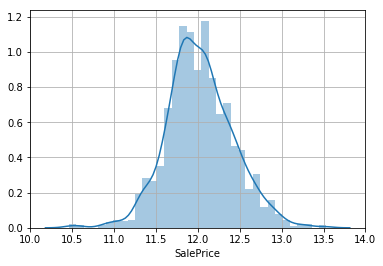

In [102]:
#plt.hist(train['SalePrice'],bins=50)
plt.grid(True) 
sns.distplot(np.log(train['SalePrice']))